# Project 1 - Data Engineering
## 2 Data Exploration and Analysis
This notebook is for the implementation of task "2 Data Exploration and Analysis", as listed in the **Project Instructions**.

<div class="alert alert-success">
<b>Overview:</b><br>
Data Exploration and Analysis consists of the following parts worth 70 points:
<ul>
    <li><b>E1 - Obtain and Scrub</b> (15 points)</li>
    <li><b>E2 - Exploratory data analysis (EDA) </b>(20 points)</li>
    <li><b>E3 - Formulate hypotheses </b>(25 points)</li>
    <li><b>Follow the guidelines for Data Exploration and Analysis below </b>(10 points)</li>
</ul></div>

<div class="alert alert-success">
<b>Guidelines for Data Explorati on and Analysis:</b><br>
    <ol>
        <li>Use a single Jupyer notebook for your project.</li>
        <li>Use only Python-code for your project.</li>
        <li>The use of automatic and semi-automatic data analyis tools is not allowed (e. g., PandasGUI, D-Tale, Mito, etc.). Only use packages we used in the coded lectures.</li>
        <li>Export your environment for submission as 'prj01-environment.txt'.</li>
        <li>Upload your resulting work as a zip file containing only a single jupyter notebook and required files to run the notebook. All cell outputs and <b>figures must display in jupyter lab</b>. (Test this, in particular when you use another environment like VS Code.)</li>
        <li>All code cells in your notebook must be runnable without errors or warnings (e. g., deprecated functions). Each error/warning subtracts -2 points (up to the full 10 points for following the  guidelines).</li>
        <li>Use only relative paths in your project.</li>
        <li>Avoid (excessive) code duplication.</li>
        <li>Avoid loops iterating over pandas objects (Series, DataFrames). Explicitly justify each exception via a comment. </li>
        <li>All coded steps in your analysis must be commented.</li>
        <li>Keep your code as well as outputs short, precise and readable. Each long or unnecessary output subtracts -2 points (up to the full 10 points for following the project guidelines).</li>
    </ol>
    <b>Late submissions are not accepted and earn you 0 points on the python project. </b>
</div>

Explicitly list which notebook toolset was used (jupyter lab/jupyter notebook/VS Code/etc.) 

**here**: MY_TOOL, MY_BROWSER

Explicitly and clearly state the chosen dataset number and title:
### Health DG 
## 99. Alzheimer's Disease and Healthy Aging Data


## E1 - Obtain and Scrub

### Obtain
Download the dataset and understand both: 
- format: wide vs. long, separaters, decimal points, encoding, etc., and 
- content: what variables are in the columns, what is their meaning?
To this end, identify and download metadata such as headers, category listings, explanatory reports, etc.
### Scrub
The aim of scrub is to create a clean version of the data for further analysis. 
- Load the dataset and take care of dtypes (dates, numbers, categories, etc.). Justify why you don't load/use specific columns.
- Check for footnotes or any other notifications on special cell content, such as time series breaks. Follow up that information, and document your decision how to deal with it. Remember: The homework 4 contained such info in the cell "76.1 b". The metadata defines what that "b" stands for.
  
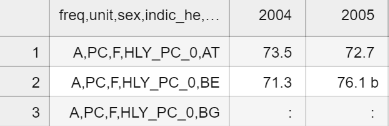
- Choose an appropriate (Multi-)Index.
- Identify:
    1. missing values and get row and column overviews. Use graphical and/or numeric approaches. Once identified, handle missing values according to column type, time series property and data set size.
    2. duplicates (justify the used column subset). Remove duplicates - if any - and inspect what you removed.
- Transform to shape (tidy vs. wide) best suited for further analysis.
- Export the clean data to a file for inspection with an external data browser (e.g., MS Excel).
- Provide an overview of the clean dataset:
    1. show the dtypes
    2. quantitative column descriptions: 
        1. categorical columns: number of unique values, counts 
        2. numeric columns: range and median

In [35]:
# Load necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr
import numpy as np
from scipy import stats
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import geopandas as gpd
import zipfile

In [36]:
##### DELETE ME #####

# Set display options to better analize the dataset
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

##### DELETE ME ##### Personal comment: Nicht das der Lector dann sagt dass wir das dataset anders analysieren sollen als jede spalte einzeln anzuschauen :) 

# Load dataset
zf = zipfile.ZipFile('Alzheimer_s_Disease_and_Healthy_Aging_Data.zip') 
df = pd.read_csv(zf.open('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv'))

In [37]:
# Check Shape and Dtypes before cleanup
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Response                    0 non-null       float64
 10  Data_Value_Unit             250937 non-null  object 
 11  DataValueTypeID             250937 non-null  object 
 12  Data_Value_Type             250937 non-null  object 
 13  Data_Value    

(250937, 39)

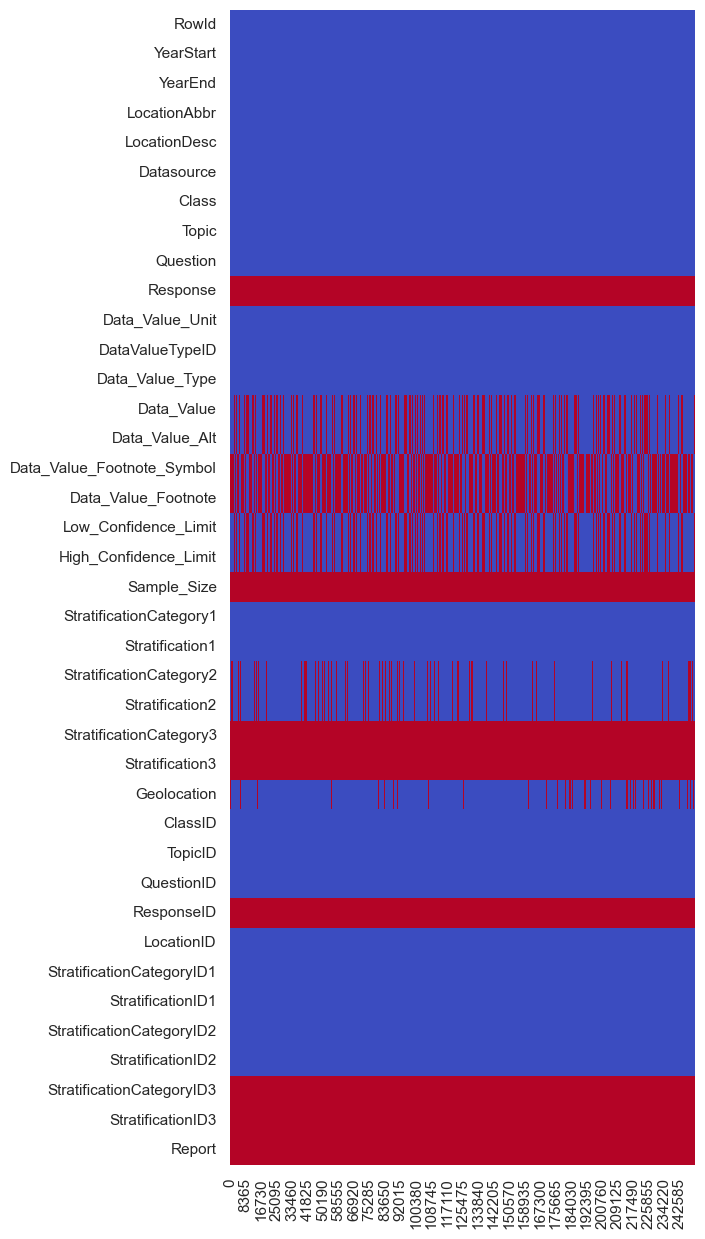

In [38]:
# Visualize missing values in heatmap
plt.figure(figsize=(6, 15))
sns.heatmap(df.T.isnull(), cbar=False, cmap='coolwarm')
plt.show()

In [39]:
# data.select_dtypes(include=['float64', 'int64']).columns
df['Datasource'].unique()

array(['BRFSS'], dtype=object)

In [40]:
##############################
##### Cleaning the data ######
##############################

# Droping columns where all rows have the value null
columns_to_drop = [ 
            'Datasource', # Droping because all rows have the same value (BRFSS)
            'Response', 
            'Sample_Size', 
            'StratificationCategory3', 
            'Stratification3',
            'ResponseID',
            'StratificationCategoryID3',
            'StratificationID3',
            'Report',
            'Data_Value_Footnote_Symbol',
            'Data_Value_Footnote' #,
            # 'Geolocation'
        ]

df_cleaned = df.drop(columns=columns_to_drop)

# Converting 'Low_Confidence_Limit' and 'High_Confidence_Limit' to numeric (if possible)
df_cleaned['Low_Confidence_Limit'] = pd.to_numeric(df_cleaned['Low_Confidence_Limit'], errors='coerce').astype(float)
df_cleaned['High_Confidence_Limit'] = pd.to_numeric(df_cleaned['High_Confidence_Limit'], errors='coerce').astype(float)

# Extracting latitude and longitude from the 'Geolocation' column
df_cleaned[['Longitude', 'Latitude']] = df_cleaned['Geolocation'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)

# Convert rest of the columns to type sting 
string_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in string_cols:
    df_cleaned[col] = df_cleaned[col].astype('string').str.strip()

# Sort the df by StartYear
df_cleaned = df_cleaned.sort_values(by='YearStart')

# Drop Geolocation as it's no longer needed
df_cleaned = df_cleaned.drop(columns='Geolocation')

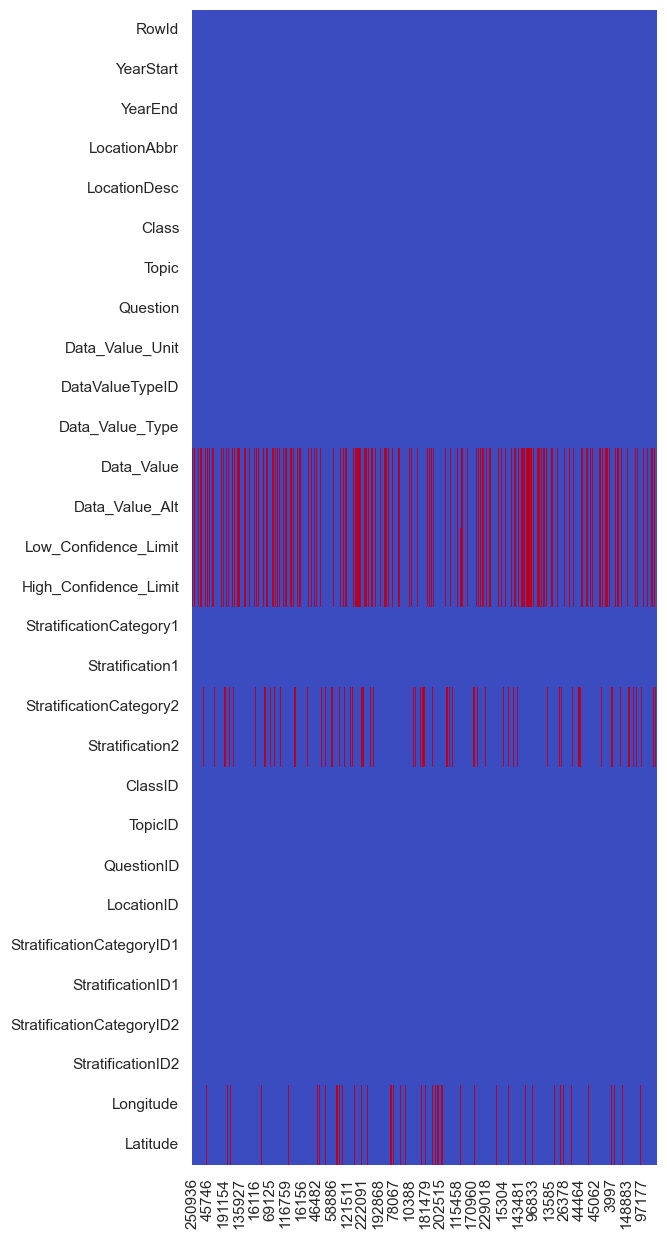

In [41]:
# Check heatmap after cleanup
plt.figure(figsize=(6, 15))
sns.heatmap(df_cleaned.T.isnull(), cbar=False, cmap='coolwarm')
plt.show()

In [42]:
# Check Shape and Dtypes after cleanup
df_cleaned.info()
df_cleaned.shape
# result: Dtypes are correctly set and 10 columns have been droped

<class 'pandas.core.frame.DataFrame'>
Index: 250937 entries, 250936 to 125468
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RowId                      250937 non-null  string 
 1   YearStart                  250937 non-null  int64  
 2   YearEnd                    250937 non-null  int64  
 3   LocationAbbr               250937 non-null  string 
 4   LocationDesc               250937 non-null  string 
 5   Class                      250937 non-null  string 
 6   Topic                      250937 non-null  string 
 7   Question                   250937 non-null  string 
 8   Data_Value_Unit            250937 non-null  string 
 9   DataValueTypeID            250937 non-null  string 
 10  Data_Value_Type            250937 non-null  string 
 11  Data_Value                 169302 non-null  float64
 12  Data_Value_Alt             169302 non-null  float64
 13  Low_Confidence_Limit       16

(250937, 29)

In [43]:
##### DELETE ME ######

# df_cleaned['Data_Value_Unit'].unique()
# df_cleaned['dfValueTypeID'].unique()
# df_cleaned['df_Value_Type'].unique()
# df_cleaned['df_Value'].unique()

##### DELETE ME ######


In [44]:
# Load geopandas df
# gdf = gpd.read_file('geopandas/cb_2018_us_state_500k.shp')

In [45]:
# merge df's
# merged_gdf = gdf.merge(df_cleaned, left_on='STUSPS', right_on='LocationAbbr')


# # Plotting
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# merged_gdf.plot(ax=ax, column='LocationDesc', legend=True)  # Replace 'your_data_column' with the column you want to visualize
# plt.show()

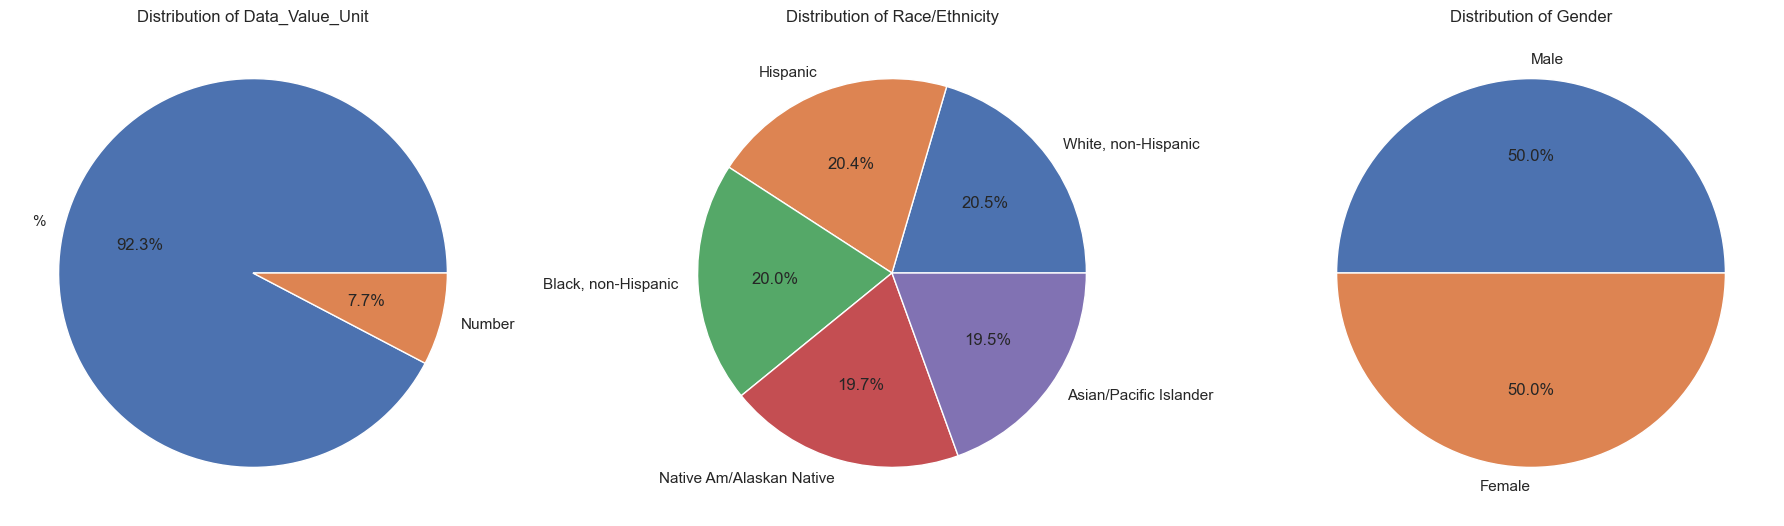

In [46]:
# Plot 1: Pie plots devided into Data_Value_Unit, Stratification2 (Ethnicity/Race),  Stratification2 (Gender) 

# Calculate value counts
value_counts_data_unit = df_cleaned['Data_Value_Unit'].value_counts()
value_counts_race_ethnicity = df_cleaned[df_cleaned['StratificationCategory2'] == 'Race/Ethnicity']['Stratification2'].value_counts()
value_counts_gender = df_cleaned[df_cleaned['StratificationCategory2'] == 'Gender']['Stratification2'].value_counts()

# Set up a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Pie chart for Data_Value_Unit
axes[0].pie(value_counts_data_unit, labels=value_counts_data_unit.index, autopct='%1.1f%%')
axes[0].set_title('Distribution of Data_Value_Unit')

# Plot 2: Pie chart for Race/Ethnicity
axes[1].pie(value_counts_race_ethnicity, labels=value_counts_race_ethnicity.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of Race/Ethnicity')

# Plot 3: Pie chart for Gender
axes[2].pie(value_counts_gender, labels=value_counts_gender.index, autopct='%1.1f%%')
axes[2].set_title('Distribution of Gender')

# Show the plots
plt.tight_layout()
plt.show()

In [47]:
# Since the data is devided into two data_value_types:

##### Spliting df for further analysis ######
df_cleaned_value_type_percent = df_cleaned[df_cleaned['Data_Value_Unit'] == '%']
df_cleaned_value_type_number = df_cleaned[df_cleaned['Data_Value_Unit'] == 'Number']

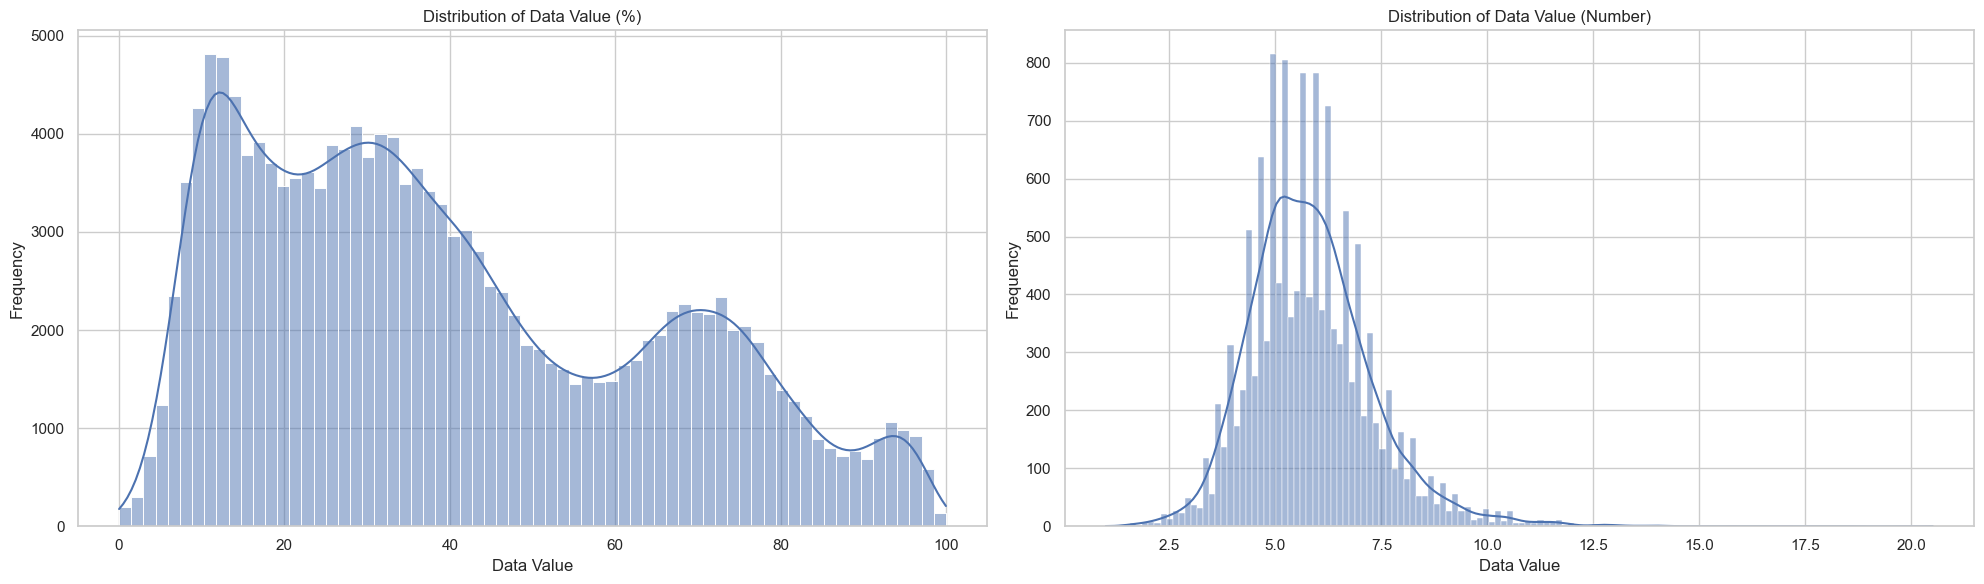

In [48]:
# Statustical Numerical description
df_subset = df_cleaned.sample(n=10000, random_state=1)

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot 1: Distribution of 'Data_Value' where 'Data_Value_Unit' == '%'
sns.histplot(df_cleaned_value_type_percent['Data_Value'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Data Value (%)')
axes[0].set_xlabel('Data Value')
axes[0].set_ylabel('Frequency')

# Plot 2: Distribution of 'Data_Value' where 'Data_Value_Unit' == 'Number'
sns.histplot(df_cleaned_value_type_number['Data_Value'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Data Value (Number)')
axes[1].set_xlabel('Data Value')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

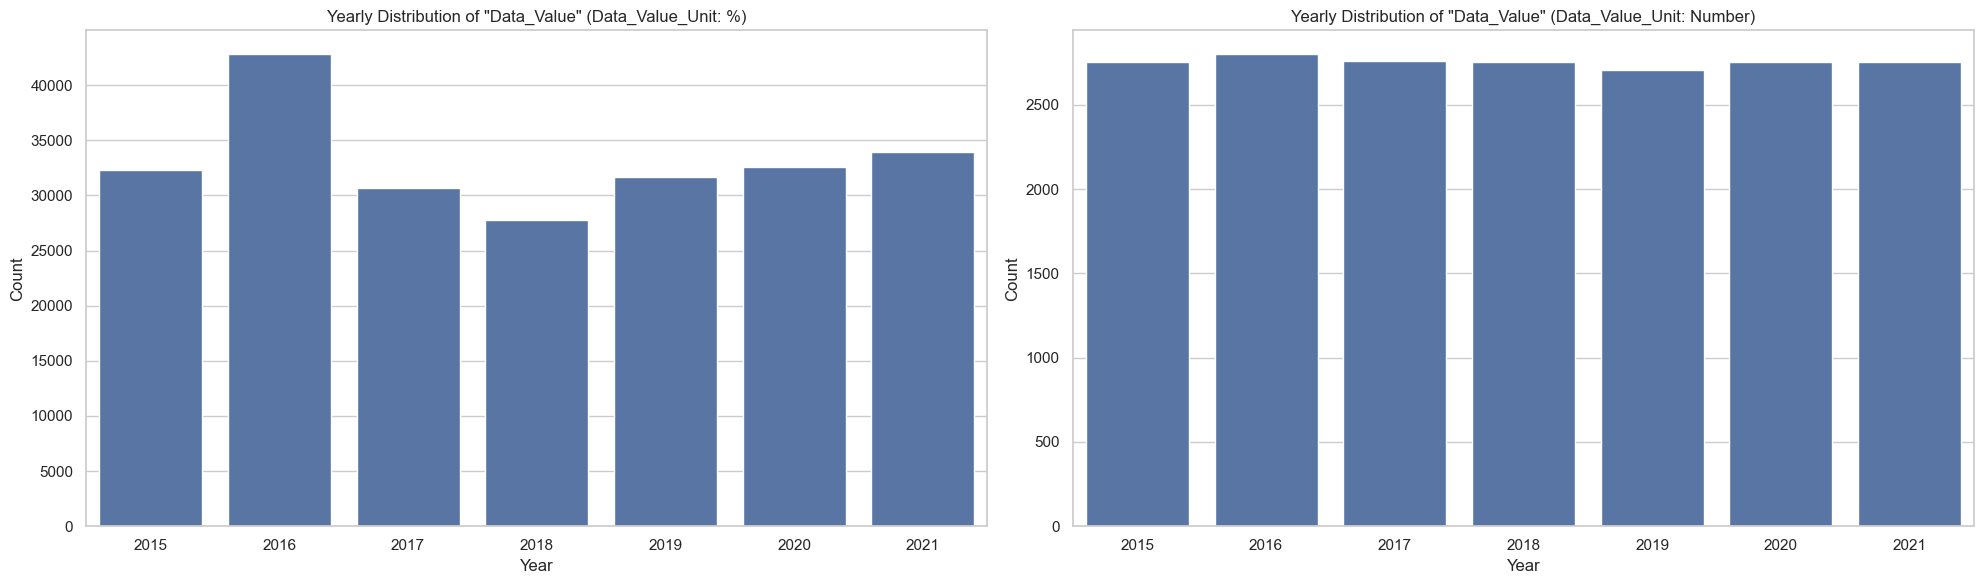

In [49]:
# Plot 2: Yearly Distribution
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot 1: Yearly Distribution for all data
sns.countplot(x='YearStart', data=df_cleaned[df_cleaned['Data_Value_Unit'] == '%'], color='#4c72b0', ax=axes[0])
axes[0].set_title('Yearly Distribution of "Data_Value" (Data_Value_Unit: %)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')

# Plot 2: Yearly Distribution for 'Data_Value_Unit' == 'Number'
sns.countplot(x='YearStart', data=df_cleaned[df_cleaned['Data_Value_Unit'] == 'Number'], color='#4c72b0', ax=axes[1])
axes[1].set_title('Yearly Distribution of "Data_Value" (Data_Value_Unit: Number)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

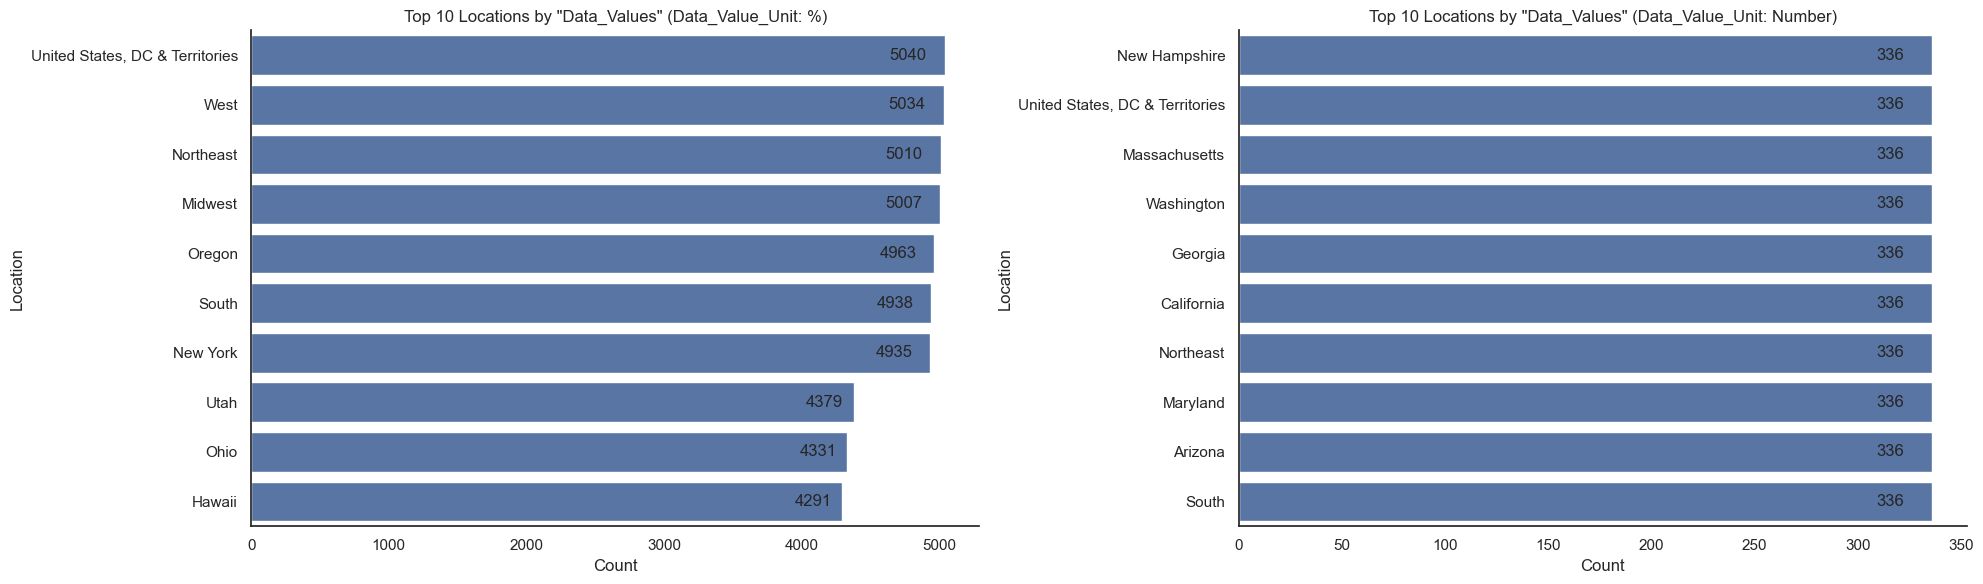

In [50]:
# # Plot 3: Top 10 Locations by Data Count
# Top 10 Locations for Data_Value_Unit == '%' and Data_Value_Unit == 'Number'
top_locations_percent = df_cleaned_value_type_percent['LocationDesc'].value_counts().head(10).sort_values(ascending=False)
top_locations_number = df_cleaned_value_type_number['LocationDesc'].value_counts().head(10).sort_values(ascending=False)

sns.set(style="white")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Remove top and right borders from plots
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Plot 1: Top 10 Locations (Data_Value_Unit: %)
sns.barplot(x=top_locations_percent.values, y=top_locations_percent.index, color='#4c72b0', ax=axes[0])
axes[0].set_title('Top 10 Locations by "Data_Values" (Data_Value_Unit: %)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Location')

# Add text labels for Plot 1
for b in axes[0].patches:
    width = b.get_width()
    axes[0].text(width - (width*0.08), b.get_y() + b.get_height() / 2, int(width), ha='left', va='center')

# Plot 2: Top 10 Locations (Data_Value_Unit: Number)
sns.barplot(x=top_locations_number.values, y=top_locations_number.index, color='#4c72b0', ax=axes[1])
axes[1].set_title('Top 10 Locations by "Data_Values" (Data_Value_Unit: Number)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Location')

# Add text labels for Plot 2
for b in axes[1].patches:
    width = b.get_width()
    axes[1].text(width - (width*0.08), b.get_y() + b.get_height() / 2, int(width), ha='left', va='center')

# Display the plots
plt.tight_layout()
plt.show()

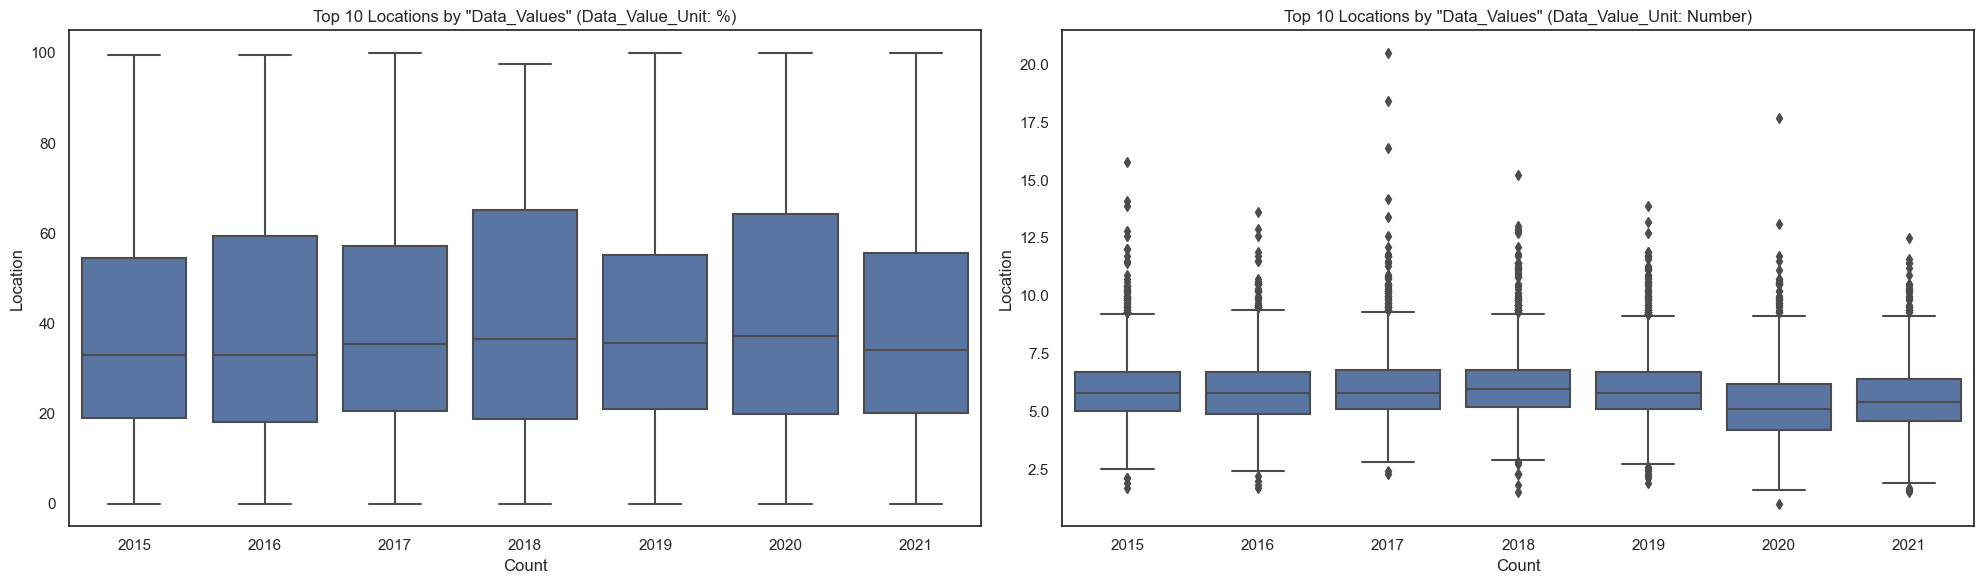

In [51]:
# Plot 4: Boxplot of Data Value by Year
sns.set(style="white")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot 1: Boxplot of Data_Values (Data_Value_Unit: %)
sns.boxplot(x='YearStart', y='Data_Value', data=df_cleaned_value_type_percent, color='#4c72b0', ax=axes[0])
axes[0].set_title('Top 10 Locations by "Data_Values" (Data_Value_Unit: %)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Location')

# Plot 2: Boxplot of Data_Values (Data_Value_Unit: Number)
sns.boxplot(x='YearStart', y='Data_Value', data=df_cleaned_value_type_number, color='#4c72b0', ax=axes[1])
axes[1].set_title('Top 10 Locations by "Data_Values" (Data_Value_Unit: Number)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Location')

# Display the plots
plt.tight_layout()
plt.show()

In [52]:
# Rows where Latitude and Longitude are null are territory data see:
territories = df_cleaned[df_cleaned['Latitude'].isna()]['LocationDesc'].unique()
territories

<StringArray>
['Midwest', 'United States, DC & Territories', 'South', 'West', 'Northeast']
Length: 5, dtype: string

In [53]:
# The dataframe contains different locations. Some of them are the 50 United states of America, others the territories of the USA
# and there are aslo four special jurisdiction territories which have to be split in order to avoid misleading data  

##### Spliting dataframe ######
special_jurisdictions = ['District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands']

df_special_jurisdictions = df_cleaned[df_cleaned['LocationDesc'].isin(special_jurisdictions)] # special jurisdictions see above
df_territories = df_cleaned[df_cleaned['LocationDesc'].isin(territories)] # us territories like: West, East, etc.
df_states = df_cleaned[~df_cleaned['LocationDesc'].isin(special_jurisdictions) & ~df_cleaned['LocationDesc'].isin(territories)] # USA's 50 states


## E2 - Exploratory data analysis (EDA)
Use the clean dataset and to understand and explore the relationships in the data (numerical, visual, statistical). This includes at least but is not limited to:
- A comprehensive textual description of meaning for relevant fields in the dataset
- Statistical/numerical descriptions and visualization techniques we learned in the course inluding correlations, distributions and groupings of variing degrees.
- Checks for data quality, e. g., completeness, plausibility, outliers
- Handling any identified problems with the data
- If necessary, use additional data wrangling in line with your EDA and only keep what's necessary for the following steps of your analysis with appropriate data granularity and form ("tidy data")

Don't:
- test/prove hypotheses here. EDA should only motivate hypotheses. 

Advanced/bonus:
- Depending on your hypothesis you may want to join external data (e.g., merge external highest education level to existing vaccination data) for additional insights.

Explain all steps taken and your thinking why you deem them necessary.

# Textual description of Fields
The cleaned dataset consists of 29 columns which contain information on various surveys regarding public health in the US.
of these, 20 are categorical and 9 are numeric. Specifically, 3 of the numeric variables are integers.
These are the most important fields in the dataset, in order of appearance in the data, as well as their data type:
 - *RowId* (string): A unique Identifier for each column. The ID contains information on some of the columns in the Row. Explicitly, it is formatted like this: *Datasource*\~*YearStart*\~*YearEnd*\~*LocationID*\~*QuestionID*\~*TopicID*\~*StratificationCategoryID1*\~*StratificationCategoryID2*.
 - *YearStart* and *YearEnd* (integers): Years when the survey started and ended, respectively.
 - *LocationAbbr* (string): an Abbreviation of the Location where the survey took place. for single states, it is the ISO-Code of the state, for regions an abbreviated form of the area (for example "NRE" for "Northeast").
 - *LocationDesc* (string): Full name of the state or region where the survey took place.
 - *Class* (string): Focus of the specific survey, eg. "Overall Health" or "Screenings and Vaccines".
 - *Topic* (string): A short description of the Topic of the survey.
 - *Question* (string): Question asked in the survey.
 - *Data_Value_Type* (string): Type of the *Data_Value*, e.g. "Mean" or "Percentage".
 - *Data_Value* (float): The actual Value of the survey result.
 - *Low_Confidence_Limit* and *High_Confidence_Limit* (floats): the lower and upper bounds of the confidence interval, respectively.
 - *StratificationCategory1* and *StratificationCategory2* (strings): Categories by which the target population of the survey is selected
 - *Stratification1* and *Stratification2* (strings): Specific stratification groups selected for the survey
 - *Latitude* and *Longitude* (floats): Coordinates of the survey

in Addition, there are *\~ID* columns which abbreviate the values into identifiers for the following columns: *Data_Value_Type*, *Class*, *Topic*, *Question*, *Location*, *StratificationCategory1*, *Stratification1*, *StratificationCategory2* and *Stratification2*





In [54]:
# Filter df for sunburst plot
df_cleaned_filtered = df_cleaned[
  (df_cleaned['Data_Value_Unit'] == '%') & 
  (df_cleaned['Stratification1'] == 'Overall') &
  (df_cleaned['LocationAbbr'] == 'US') &
  (df_cleaned['StratificationCategory2'] == 'Gender')
  ].sort_values(by='Topic')

fig = px.sunburst(df_cleaned_filtered, 
                  path=['Stratification2', 'Topic'],  
                  values='Data_Value',  
                  color='Data_Value', 
                  hover_name='Topic', 
                  title='Sunburst chart for topics by gender in whole of the US', 
                  color_continuous_scale=px.colors.sequential.RdBu_r,
                  height=800,
                  width=1000)

fig.show()

In [55]:
# Filter the data for 'Female'
df_female = df_cleaned_filtered[df_cleaned_filtered['Stratification2'] == 'Female'].sort_values(by='Topic')

# Create histogram for 'Female'
fig_female = px.histogram(df_female, x='Data_Value', color='Topic',
                          labels={'Data_Value': 'Data Value (%)'},
                          title='Histogram of Topics for Female',
                          marginal='rug')
fig_female.update_layout(legend=dict(font=dict(size=10)))

# Filter the data for 'Male'
df_male = df_cleaned_filtered[df_cleaned_filtered['Stratification2'] == 'Male'].sort_values(by='Topic')

# Create histogram for 'Male'
fig_male = px.histogram(df_male, x='Data_Value', color='Topic',
                        labels={'Data_Value': 'Data Value (%)'},
                        title='Histogram of Topics for Male',
                        marginal='rug')
fig_male.update_layout(legend=dict(font=dict(size=10)))

# Show the figures
fig_female.show()
fig_male.show()

In [56]:
# Group by 'YearStart' and 'Topic', then calculate the mean of 'Data_Value'
avg_data = df_cleaned_filtered.groupby(['YearStart', 'Topic'])['Data_Value'].mean().reset_index()

# Create an interactive line plot
fig = px.line(avg_data, x='YearStart', y='Data_Value', color='Topic',
              labels={'Data_Value': 'Average Data Value (%)', 'YearStart': 'Year'},
              title='Trend in Data Value by Topic')

fig.update_layout(
  height=920
)

fig.show()

In [57]:
df_cleaned_filtered = df_cleaned[
  (df_cleaned['Data_Value_Unit'] == '%') & 
  (df_cleaned['Stratification1'] == 'Overall') &
  (df_cleaned['LocationAbbr'] == 'US') &
  (df_cleaned['StratificationCategory2'] == 'Race/Ethnicity')
  ] 

# Creating a horizontal boxplot
fig = px.box(df_cleaned_filtered, y='Stratification2', x='Data_Value', 
             color='Stratification2',  # This adds different colors for each ethnicity/race
             hover_data=['Topic'],  # This sets the hover name to 'Topic'
             orientation='h',  # This makes the boxplot horizontal
             title='Horizontal Boxplot of Data Value by Race/Ethnicity',
             points='all'
             )

# Show the figure
fig.show()

In [58]:
# In general: LocationDesc has X.classes has X.stratifications for years 2015 to 2021

## E3 - Formulate hypotheses

*Note: Read this section entirely and understand it - every group member.*

A hypothesis is an idea or explanation for something that is based on known facts but has not yet been proved. A hypothesis is a compact, concise statement, such as: "Individuals with higher income have (on average) more offspring.", that will be answered based on facts (the data). https://gradcoach.com/what-is-a-research-hypothesis-or-scientific-hypothesis/

Formulate 5 non-trivial hypotheses, 1 per group member, and regard the following criteria: 
- State the hypothesis explicitly in concise language. 
- The hypothesis must be **motivated** by either **EDA results** or **literature** (citation in the report needed).
- The hypothesis must refer to **endpoints** that are **testable**. Specifically, the endpoint must be derived from the data.
- Think of real-life use cases/consequences of your results (textual description). 
- For each hypothesis explain all executed steps. 
- In case of extreme or implausible results check the validity of your data.
- For each hypothesis export the artifacts (figures, tables, etc.) required for the report.
- If you decide to use a statistical test, use it properly. In particular, check the validity and comparability of the samples.

Do not:
- State nebulous, vague hypotheses. These don't contain endpoints and are unclear to test (i.e., answer).
- Use post-hoc hypotheses. Portraying an empirically inspired **post hoc hypothesis as a priori** violates the **falsification principle** crucial for hypothesis-driven (that is, confirmatory) empirical research. Falsification is severe scientific fraud.
- State trivial hypotheses (e.g., hypthesis 2: "Not Hypothesis 1").
- Answer based on "common knowledge".
- Try to **produce positively tested hypotheses**. If a well motivated hypothesis is negative, this is an important finding (see Simpson's Paradox). The value of a tested hypothesis lies in the information or learning it provides.

Example: The homework with Simpson's Paradox. The pooled overall comparison between the genders would be the EDA motivating the hypothesis: "At UC Berkeley the by-department admissions rate for females is lower than for males." It should be tested using samples of department admission rates for the 2 **groups** male and female. No steps of the test should be done in EDA (or a priory to stating the hypothesis). The groups should be compared graphically, e.g., via a stripplot overlayed with a boxplot. The figure should be labelled properly and exported for the report. A (paired) t-test *may* be used to test this hypothesis statistically. For different data (e.g., time series) different approaches may be required.


### E3-H1: "xxx"
Author: Group member 1


### E3-H2: "People living in coastal areas have better mental health"
Author: Deleja-Hotko Julian

Source: White, M./Alcock, I./Wheeler, B./Depledge, M. (2013): Coastal proximity, health and well-being: Results from a longitudinal panel survey, in: Health & Place, vol. 23, pp. 97–103, [\[online\]](https://www.sciencedirect.com/science/article/abs/pii/S1353829213000816?via%3Dihub) doi:10.1016/j.healthplace.2013.05.006  .

In order to analyse this, the dataset first needs to be filtered for states which have a coastline. 
For the purpose of this analysis, states which border on the great lakes will be included in the coastal states.

In [59]:
coastal_states = ['AL', 'AK', 'CA', 'CT', 'DE', 'FL', 'GA', 'HI', 'LA', 'MA', 'MD', 'ME', 'MN', 'MS', 'NC', 'NH', 'NJ', 'NY', 'OR', 'RI', 'SC', 'TX', 'VA', 'WA'] # abbreviations of all states with coastlines
great_lake_states = ['IL', 'IN', 'MI','NY', 'OH', 'OI', 'WI']

df_coastal = df_states[df_states['LocationAbbr'].isin(list(set(coastal_states+great_lake_states)))] # only states which have a coast to either an ocean or the great lakes
df_landlocked = df_states[~df_states['LocationAbbr'].isin(list(set(coastal_states+great_lake_states)))] # only states without any coast

print('Number of coastal states: ', df_coastal['LocationAbbr'].nunique())
print('Number of landlocked states: ', df_landlocked['LocationAbbr'].nunique())

Number of coastal states:  29
Number of landlocked states:  21


Next, the two datasets are reduced to only those with the classification "Mental Health".
This reduces the dataset to only two topics:

In [60]:
df_coastal_mh = df_coastal[df_coastal['Class']=='Mental Health']
df_landlocked_mh = df_landlocked[df_landlocked['Class']=='Mental Health']
print('remaining topics:')
for x in list(set(list(df_coastal_mh['Topic'].unique()) + list(df_landlocked_mh['Topic'].unique()))):
    print(x)

remaining topics:
Frequent mental distress
Lifetime diagnosis of depression


Both of these topics are surveying signs of *low* mental health, meaning that for all of the following analysis, a lower number is indicative of better mental health.

In order to get an overview of the data, boxplots are generated:

In [61]:
# create figure
fig_mh_box = make_subplots(
    rows=1,cols=2,
    subplot_titles=("Coastal Mental Health", "Landlocked Mental Health")
    ,horizontal_spacing=0.075
)

# add the box plot for coastal
fig_mh_box.add_trace(
    go.Box(
        x=df_coastal_mh['Topic'],
        y=df_coastal_mh['Data_Value'],
        name='Coastal',
        customdata=df_coastal_mh['LocationDesc'],
        hovertemplate='<br>Survey: %{x}<br>Value: %{y}%<br>State: %{customdata}',
        boxmean='sd',
        fillcolor='lightblue',
        line=dict(color='cornflowerblue'),
        marker=dict(symbol='line-ew-open',size=10)
    ),
    row=1, col=1
)

# add the box plot for landlocked
fig_mh_box.add_trace(
    go.Box(
        x=df_landlocked_mh['Topic'],
        y=df_landlocked_mh['Data_Value'],
        name='Landlocked',
        customdata=df_landlocked_mh['LocationDesc'],
        hovertemplate='<br>Survey: %{x}<br>Value: %{y}%<br>State: %{customdata}',
        boxmean='sd',
        fillcolor='beige',
        line=dict(color='goldenrod'),
        marker=dict(symbol='line-ew-open',size=10)
    ),
    row=1, col=2
)

# Update layout to include labels
fig_mh_box.update_layout(
    height=750, width=1500, 
    title_text="Comparison of Mental Health surveys responses in coastal states and landlocked states",
    xaxis=dict(title='Topic'),
    xaxis2=dict(title='Topic',matches='x1'),
    yaxis=dict(title='Percentage of affirmative responses (%)'),
    yaxis2=dict(title='Percentage of affirmative responses (%)',matches='y1')
)

fig_mh_box.show()

In these Boxplots, coastal States appear to have slightly better mental health (as demonstrated by lower results), although the outliers (which are present in considerable numbers in all contexts), particularly in terms of depression also appear to be a little higher.

To look further into this, the year-to-year development of both groups is charted.

For readability, the median per topic for each region is used, instead of the 50 different traces for all US states.
The median was chosen as it is less affected by the previously noted not insignificant number of outliers.

In [62]:
def prepare_line_data(df, label):
    df_median = df.groupby(['YearEnd', 'Topic']).agg({'Data_Value':'median'}).reset_index()
    df_median['Label'] = label
    return df_median

df_coastal_line = prepare_line_data(df_coastal_mh, 'Coastal')
df_landlocked_line = prepare_line_data(df_landlocked_mh, 'Landlocked')
df_combined = pd.concat([df_coastal_line, df_landlocked_line])

color_map = {
    'Coastal - Lifetime diagnosis of depression': 'skyblue',
    'Coastal - Frequent mental distress': 'cornflowerblue',
    'Landlocked - Lifetime diagnosis of depression': 'lightsalmon',
    'Landlocked - Frequent mental distress': 'indianred'
}
# create column 'color' which maches the keys of the color_map dictionary
df_combined['Color'] = df_combined['Label'] + ' - ' + df_combined['Topic']

# create line plot
fig_line = px.line(df_combined, x='YearEnd', y='Data_Value', color='Color',
                   color_discrete_map=color_map,
                   labels={'Data_Value': 'Mean Data Value', 'YearEnd': 'Year'},
                   title='Mean Data Value Over Years by Topic and State Type')

# Update layout to include labels
fig_line.update_layout(
    height = 500, width = 1100, 
    title_text = "Development over time of reported mental health issues",
    xaxis = dict(title = 'Year'),
    yaxis = dict(title = 'Median percentage of affirmative responses (%)'),
)

fig_line.show()

Here, landlocked countries can be seen to consistently have higher (meaning worse) results for depression diagnoses, whereas reported figures of frequent mental distress are very similar for most of the time period, with landlocked countries again diverging upward in the more recent years.

Now to perform statistical tests:

Before the actual tests can be done, The dataframes are further split up according to the topic, to create one dataframe per survey.

In [63]:
df_coastal_mh_dep = df_coastal_mh[df_coastal_mh['Topic']=='Lifetime diagnosis of depression']['Data_Value'].dropna()
df_coastal_mh_dist = df_coastal_mh[df_coastal_mh['Topic']=='Frequent mental distress']['Data_Value'].dropna()
df_landlocked_mh_dep = df_landlocked_mh[df_landlocked_mh['Topic'] == 'Lifetime diagnosis of depression']['Data_Value'].dropna()
df_landlocked_mh_dist = df_landlocked_mh[df_landlocked_mh['Topic']=='Frequent mental distress']['Data_Value'].dropna()

First a staticstical test for depression:

In [64]:
dep_corr, dep_p_value = stats.ttest_ind(df_landlocked_mh_dep, df_coastal_mh_dep,equal_var=False)

print(f'Correlation coefficient: {dep_corr:.5f}\np-value: {dep_p_value}')

Correlation coefficient: 5.71787
p-value: 1.145001612232638e-08


A positive coefficient indicates that the survey results for the topic "Lifetime diagnosis of depression" are higher (meaning worse) in landlocked states compared to coastal states.
The magnitude of the coefficient (5.718) suggests a relatively large difference between the groups.

A p-value of 1.145e−8 is extremely small and far below the significance level of 0.05.  Therefore the null hypothesis can be rejected with a high level of confidence. This means there is statistically significant evidence to suggest that being a coastal or landlocked state is associated with differences in the reported values for "Lifetime diagnosis of depression."

Secondly, repeating the test for general forms of mental distress:

In [65]:
dist_corr, dist_p_value = stats.ttest_ind(df_landlocked_mh_dist, df_coastal_mh_dist, equal_var=False)

print(f'Correlation coefficient: {dist_corr:.5f}\np-value: {dist_p_value}')

Correlation coefficient: 1.22687
p-value: 0.21994534467697138


The positive coefficient of 1.227 indicates that reports of frequent mental distress are also higher in landlocked states, albeit to a much lower degree than figures for depression.

However, a p-value of 0.22 is well above the significance level of 0.05, meaning there is a substantial possibility that this result is simply due to random chance rather than any correlation. 

In conclusion, while residents of states with coastline report consistently lower numbers of having been diagnosed with types of depression, no clear link between proximity to a coastline and more generalized forms of mental distress can be established.

### E3-H3: "Obese People tend to have higher bloodpressure"
Author: Topór Karol


In [66]:
# high_blood_pressure_data = df_cleaned_percent[(df_cleaned_percent['Topic'] == 'High blood pressure ever') & (df_cleaned_percent['Stratification2'] == 'Female') | (df_cleaned_percent['Stratification2'] == 'Male')]
# obisity_data = df_cleaned_percent[(df_cleaned_percent['Topic'] == 'Obesity') & (df_cleaned_percent['Stratification2'] == 'Female') | (df_cleaned_percent['Stratification2'] == 'Male')]
# pd.DataFrame({"High Blood Pressure": high_blood_pressure_data["Data_Value"].describe(), "Obesity":obisity_data["Data_Value"].describe()})

In [67]:
# # Group the data by 'YearStart', 'Stratification1', and 'Topic', then calculate the mean of 'Data_Value'
# high_blood_pressure_avg= high_blood_pressure_data.groupby(['YearStart', 'Stratification2', 'Topic'])['Data_Value'].mean().reset_index()
# obisity_avg = obisity_data.groupby(['YearStart', 'Stratification2', 'Topic'])['Data_Value'].mean().reset_index()

# # Initialize a subplot figure
# fig = make_subplots()

# # Add traces for obesity for each age group
# for age_group in obisity_avg['Stratification2'].unique():
#     filtered_data = obisity_avg[obisity_avg['Stratification2'] == age_group]
#     fig.add_trace(go.Scatter(
#         x=filtered_data['YearStart'],
#         y=filtered_data['Data_Value'],
#         mode='lines',
#         name=f'Obesity - {age_group}'
#     ))

# # Add traces for high blood pressure for each age group
# for age_group in high_blood_pressure_avg['Stratification2'].unique():
#     filtered_data = high_blood_pressure_avg[high_blood_pressure_avg['Stratification2'] == age_group]
#     fig.add_trace(go.Scatter(
#         x=filtered_data['YearStart'],
#         y=filtered_data['Data_Value'],
#         mode='lines',
#         name=f'High Blood Pressure - {age_group}'
#     ))

# # Update the layout if necessary
# fig.update_layout(
#     title='Trends in High Blood Pressure and Obesity Over the Years by Age Group',
#     xaxis_title='Year',
#     yaxis_title='Average Data Value',
# )

# # Show the figure
# fig.show()
# # Pivot the data to have one column per age group within each topic for plotting
# pivoted_data = aggregated_data.pivot(index='YearStart', columns=['Topic', 'Stratification1'], values='Data_Value').reset_index()

# # Melt the pivoted data to long format for plotting with Plotly
# melted_data = pivoted_data.melt(id_vars='YearStart', var_name=['Topic', 'Age Group'], value_name='Percentage')

# # Create the line plot
# fig = px.line(melted_data, x='YearStart', y='Percentage', color='Age Group', line_group='Topic',
#               labels={'YearStart': 'Year', 'Percentage': 'Percentage (%)'},
#               title='Trends in High Blood Pressure and Obesity Over the Years by Age Group')

# # Show the interactive plot
# fig.show()

### E3-H4: "People in the study who take blood medications don't tend to have arthritis."
Author: Stefan Bartl


In the first step, the neccesary data need to be filtered. In case of this hypothesis, we need top extract two dataframes. On the one hand we have the arthritis data, and on the other the blood pressure medication. Both variables which needs to be observed (`Data_Value`) are in percentage. To get a first impression of the data, a 5-point analysis is made.

In [92]:
df_a_b = df_states[
  (df_states['Data_Value_Unit'] == '%') & 
  (df_states['StratificationID1'] == 'AGE_OVERALL') &
  (df_states['StratificationCategoryID2'] == 'OVERALL')
  ] 

arthritis_data = df_a_b[df_a_b["Topic"] == "Arthritis among older adults"]
blood_medication_data = df_a_b[df_a_b["Topic"] == "Taking medication for high blood pressure"]

pd.DataFrame({"Arthritis": arthritis_data["Data_Value"].describe(), "Blood Med":blood_medication_data["Data_Value"].describe()})

,Arthritis,Blood Med
count,248.000000,198.000000
mean,42.838710,87.590909
std,4.476375,3.012481
min,31.900000,77.100000
25%,40.000000,86.300000
50%,42.050000,88.350000
75%,45.700000,89.700000
max,59.700000,93.000000


To get a first glimpes of the data, a histogram is displayed. The distribution of arthritis seems to be like normailzed (gausian bell curve). Blood medication data has a very slight rightward steepness.

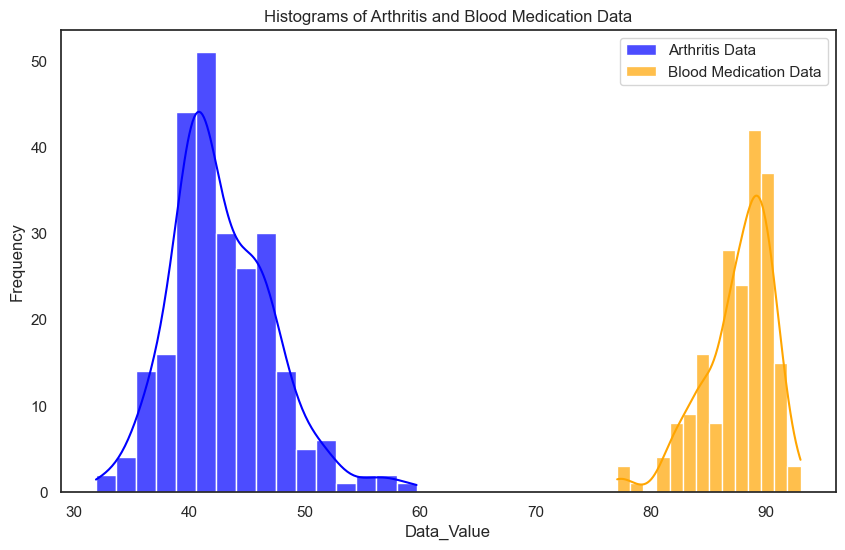

In [93]:
plt.figure(figsize=(10, 6))

sns.histplot(arthritis_data["Data_Value"],kde=True ,label="Arthritis Data", color="blue", alpha=0.7)
sns.histplot(blood_medication_data["Data_Value"], kde=True, label="Blood Medication Data", color="orange", alpha=0.7)
plt.legend()

# plt.xlabel("Data Value in %")
plt.ylabel("Frequency")
plt.title("Histograms of Arthritis and Blood Medication Data")

plt.show()

To see if there are any outliers, the visualization of a bloxplot is the best choice. As you can see in the following plot, we have no outliers in the dataset.

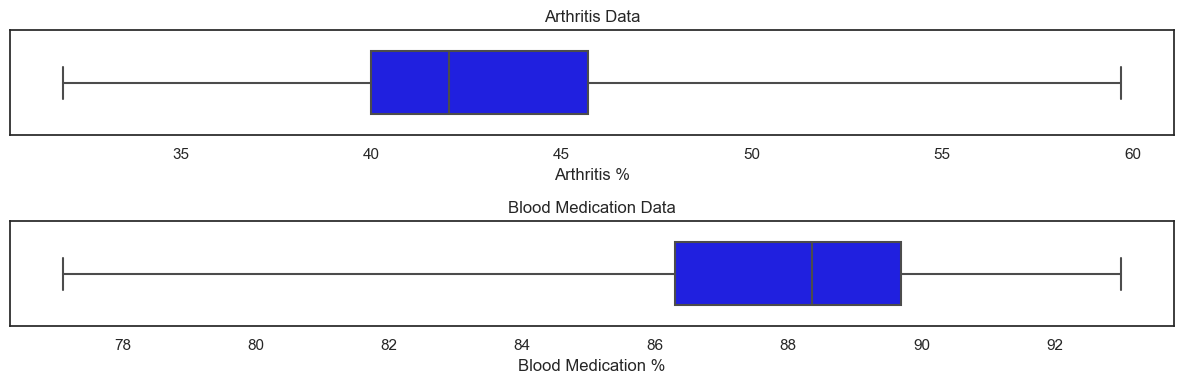

In [94]:
plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
sns.boxplot(
    data=arthritis_data, x="Data_Value",
    whis=[0, 100], width=.6, color="blue"
)
plt.title('Arthritis Data')
plt.xlabel('Arthritis %')

plt.subplot(2, 1, 2)
sns.boxplot(
    data=blood_medication_data, x="Data_Value",
    whis=[0, 100], width=.6, color="blue"
)
plt.title('Blood Medication Data')
plt.xlabel('Blood Medication %')

plt.tight_layout()
plt.show()

To work with clean data, all values in arthritis & blood_medication dataframe which have `NAN` values will be dropped. To display the result of the data with its corresponending regression line, a regplot is implemented.

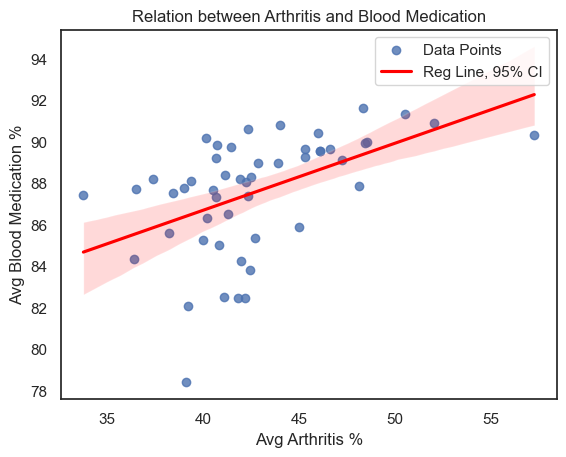

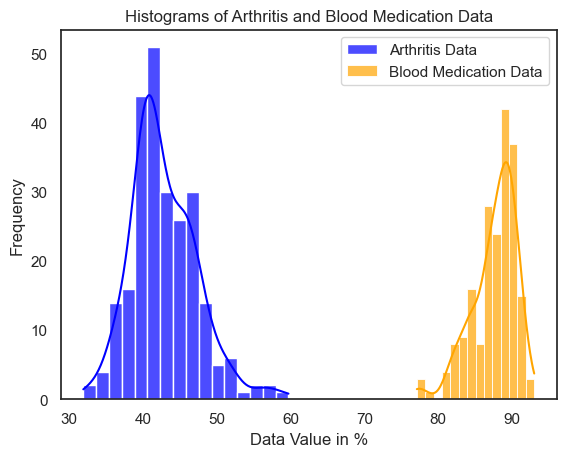

In [95]:
# Drop NAN values in Data_Value
arthritis_data = arthritis_data.dropna(subset=['Data_Value'])
blood_medication_data = blood_medication_data.dropna(subset=['Data_Value'])

# groupby Location and get the mean of Data_Value
avg_arthritis = arthritis_data.groupby('LocationAbbr')['Data_Value'].mean()
avg_blood_medication = blood_medication_data.groupby('LocationAbbr')['Data_Value'].mean()

df_avg = pd.DataFrame({'Average Arthritis': avg_arthritis, 'Average Blood Medication': avg_blood_medication})

# regression plot with 95% confidence interval
sns.regplot(data=df_avg, x='Average Arthritis', y='Average Blood Medication' ,ci=95, fit_reg=True, line_kws={'color':'red'}, truncate=True)
plt.xlabel('Avg Arthritis %')
plt.ylabel('Avg Blood Medication %')
plt.title('Relation between Arthritis and Blood Medication')
plt.legend(['Data Points', "Reg Line, 95% CI"])
plt.show()

sns.histplot(arthritis_data["Data_Value"],kde=True ,label="Arthritis Data", color="blue", alpha=0.7)
sns.histplot(blood_medication_data["Data_Value"], kde=True, label="Blood Medication Data", color="orange", alpha=0.7)
plt.legend()

plt.xlabel("Data Value in %")
plt.ylabel("Frequency")
plt.title("Histograms of Arthritis and Blood Medication Data")

plt.show()


In [96]:
correlation_coefficient, p_value = stats.pearsonr(avg_arthritis, avg_blood_medication)
correlation_coefficient, p_value

(0.4919916702597069, 0.0002847191829754944)

In the first step, the neccesary states-data need to be filtered. In case of this hypothesis, we need top extract two dataframes & and only take values of the Stratification "Overall", which face the data all races, ages and gender. On the one hand we have the arthritis data, and on the other the blood pressure medication. Both variables which needs to be observed (`Data_Value`) are in percentage. To get a first impression of the data, a 5-point analysis is made.

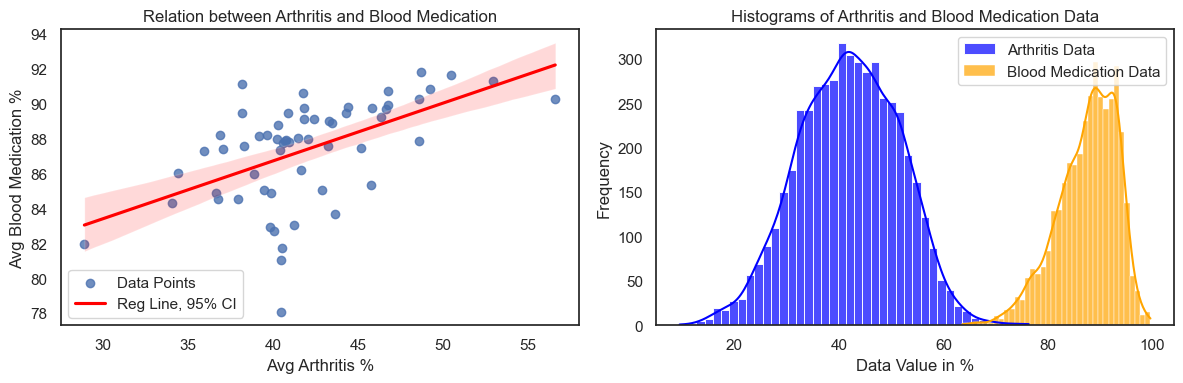

In [73]:
#For the report

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(data=df_avg, x='Average Arthritis', y='Average Blood Medication', ci=95, fit_reg=True, line_kws={'color':'red'}, truncate=True, ax=axs[0])
axs[0].set_xlabel('Avg Arthritis %')
axs[0].set_ylabel('Avg Blood Medication %')
axs[0].set_title('Relation between Arthritis and Blood Medication')
axs[0].legend(['Data Points', "Reg Line, 95% CI"])

sns.histplot(arthritis_data["Data_Value"], kde=True, label="Arthritis Data", color="blue", alpha=0.7, ax=axs[1])
sns.histplot(blood_medication_data["Data_Value"], kde=True, label="Blood Medication Data", color="orange", alpha=0.7, ax=axs[1])
axs[1].legend()
axs[1].set_xlabel("Data Value in %")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Histograms of Arthritis and Blood Medication Data")

plt.tight_layout()
plt.show()

### E3-H5: "States with higher rates of frequent mental distress tend to have higher rates of binge drinking."
Author: Martin Siska

Source: https://gothamist.com/news/1-in-6-new-yorkers-report-drinking-alcohol-excessively-ny-health-officials-say

In [74]:
mental_distress_data = df_states[df_states['Topic'].str.contains('Frequent Mental Distress', case=False)]
binge_drinking_data = df_states[df_states['Topic'].str.contains('Binge Drinking within Past 30 Days', case=False)]

mental_distress_data = mental_distress_data.dropna(subset=['Data_Value'])
binge_drinking_data = binge_drinking_data.dropna(subset=['Data_Value'])

# groupby Location and get the mean of Data_Value
avg_mental = mental_distress_data.groupby('LocationAbbr')['Data_Value'].mean()
avg_drinking = binge_drinking_data.groupby('LocationAbbr')['Data_Value'].mean()

df_avg = pd.DataFrame({'Average Mental Distress': avg_mental, 'Average Binge Drinking': avg_drinking})

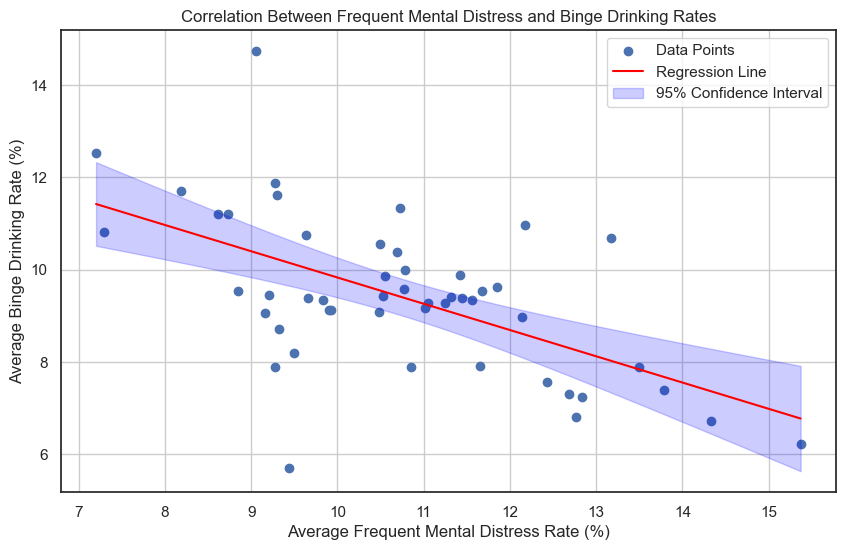

In [75]:
# Extract the top 5 states for 'Average Mental Distress'
top_5_mental_distress = df_avg.nlargest(5, 'Average Mental Distress')

# Extract the top 5 states for 'Average Binge Drinking'
top_5_binge_drinking = df_avg.nlargest(5, 'Average Binge Drinking')

slope, intercept, r_value, p_value, std_err = stats.linregress(avg_mental, avg_drinking)

# Create arrays for the regression line
x = np.array(avg_mental)
y = np.array(avg_drinking)
x_reg = np.linspace(x.min(), x.max(),100)
y_reg = slope * x_reg + intercept

# Calculate the prediction interval
pred_error = y - (slope * x + intercept)
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
t_stat = stats.t.ppf(1-0.025, df=degrees_of_freedom)  # 2-tailed t-statistic for 95% CI
conf_interval = t_stat * residual_std_error * np.sqrt(1/len(x) + (x_reg - np.mean(x))**2 / np.sum((x - np.mean(x))**2))

# Creating scatter plot with regression line and confidence interval of 95%
plt.figure(figsize=(10, 6))

plt.scatter(x, y, label='Data Points')
plt.plot(x_reg, y_reg, color='red', label='Regression Line')

# Filling the confidence interval
plt.fill_between(x_reg, y_reg - conf_interval, y_reg + conf_interval, color='blue', alpha=0.2, label='95% Confidence Interval')

# Adding labels and title
plt.title('Correlation Between Frequent Mental Distress and Binge Drinking Rates')
plt.xlabel('Average Frequent Mental Distress Rate (%)')
plt.ylabel('Average Binge Drinking Rate (%)')
plt.legend()
plt.grid(True) 
plt.show()

In [76]:
correlation_coefficient, p_value = stats.pearsonr(avg_mental, avg_drinking)

correlation_coefficient, p_value

# The Pearson correlation coefficient between average rates of 'Frequent Mental Distress' and 'Binge Drinking' is approximately -0.58,
# and the p-value is approximately 0.0000091. This p-value is much lower than the significance level of 0.025 that is alpha for 95% confidence interval,
# indicating that the negative correlation between the two variables is statistically significant. 

(-0.5822316691455659, 9.189865192561927e-06)

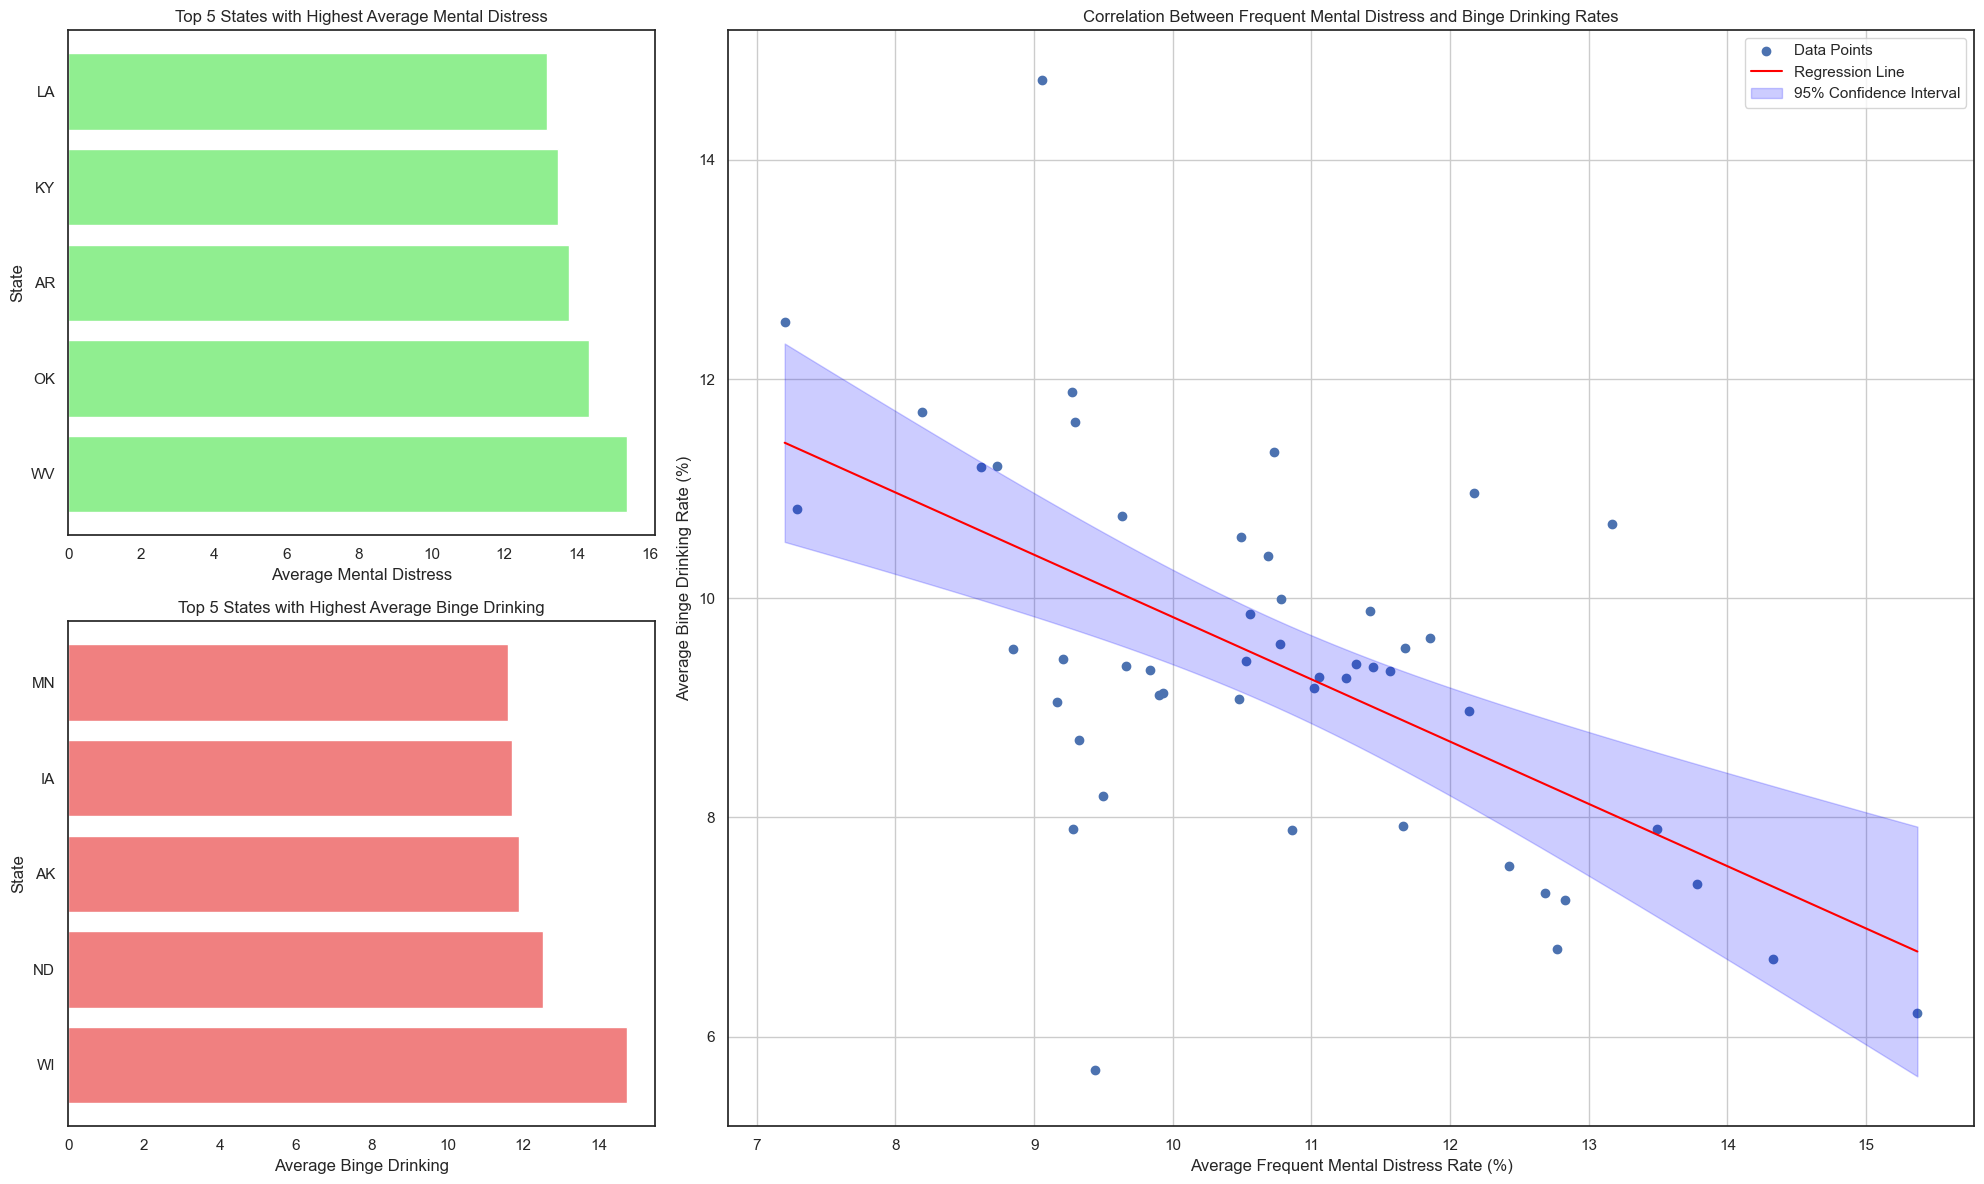

In [77]:
fig = plt.figure(figsize=(20, 12))

# Defining the axes
ax1 = plt.subplot2grid((2, 3), (0, 0), rowspan=1, colspan=1)  # Top 5 States
ax2 = plt.subplot2grid((2, 3), (1, 0), rowspan=1, colspan=1)  # Bottom 5 States
ax3 = plt.subplot2grid((2, 3), (0, 1), rowspan=2, colspan=2)  # Scatter Plot

# Plotting the top 5 states with horizontal bars
ax1.barh(top_5_mental_distress.index, top_5_mental_distress['Average Mental Distress'], color='lightgreen')
ax1.set_title('Top 5 States with Highest Average Mental Distress')
ax1.set_xlabel('Average Mental Distress')
ax1.set_ylabel('State')

# Plotting the bottom 5 states with horizontal bars
ax2.barh(top_5_binge_drinking.index, top_5_binge_drinking['Average Binge Drinking'], color='lightcoral')
ax2.set_title('Top 5 States with Highest Average Binge Drinking')
ax2.set_xlabel('Average Binge Drinking')
ax2.set_ylabel('State')

# Scatter plot with regression line and confidence interval
ax3.scatter(x, y, label='Data Points')
ax3.plot(x_reg, y_reg, color='red', label='Regression Line')
ax3.fill_between(x_reg, y_reg - conf_interval, y_reg + conf_interval, color='blue', alpha=0.2, label='95% Confidence Interval')
ax3.set_title('Correlation Between Frequent Mental Distress and Binge Drinking Rates')
ax3.set_xlabel('Average Frequent Mental Distress Rate (%)')
ax3.set_ylabel('Average Binge Drinking Rate (%)')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()